In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/flood_dataset_classification.csv')

Mounted at /content/drive


In [3]:
# Import Required Libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For building the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset
# Make sure the .csv file is in the same folder as your notebook



columns_to_drop = ['Total Deaths', 'Total Affected', 'duration', 'Disaster Type']
df.drop(columns=columns_to_drop, inplace=True)


# Display first few rows of the CLEANED dataset
print("Dataset loaded and cleaned successfully. Here are the first 5 rows:")
print(df.head())

Dataset loaded and cleaned successfully. Here are the first 5 rows:
   Latitude  Longitude  time     Rainfall  Elevation      Slope  distance  \
0   52.6717    -0.2995  1900  1383.125626       11.0   1.788207       0.0   
1   35.6897   139.6920  1909  1383.125626       49.0  24.356508       0.0   
2   39.9050   116.3910  1909   580.345856       55.0   8.374380       0.0   
3   23.1288   113.2590  1912  2993.401777        7.0  12.917221       0.0   
4   39.1467   117.2060  1913  1383.125626        3.0   1.513093       0.0   

   occured  
0        1  
1        1  
2        1  
3        1  
4        1  


In [5]:
df.head()

,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance,occured
0,52.6717,-0.2995,1900,1383.125626,11.0,1.788207,0.0,1
1,35.6897,139.6920,1909,1383.125626,49.0,24.356508,0.0,1
2,39.9050,116.3910,1909,580.345856,55.0,8.374380,0.0,1
3,23.1288,113.2590,1912,2993.401777,7.0,12.917221,0.0,1
4,39.1467,117.2060,1913,1383.125626,3.0,1.513093,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   6237 non-null   float64
 1   Longitude  6237 non-null   float64
 2   time       6237 non-null   int64  
 3   Rainfall   6237 non-null   float64
 4   Elevation  6237 non-null   float64
 5   Slope      6237 non-null   float64
 6   distance   6237 non-null   float64
 7   occured    6237 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 389.9 KB


In [7]:
df.shape
df.describe()

,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance,occured
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6.237000e+03,6237.000000
mean,18.767296,25.577775,1994.058041,1200.677851,604.385537,7.169169,5.440781e+03,0.672118
std,23.205920,75.478904,20.522141,1164.591241,855.309741,8.954785,8.607790e+04,0.469479
min,-53.162569,-175.273869,1900.000000,0.547090,-29.000000,0.000000,0.000000e+00,0.000000
25%,4.868178,-43.415278,1987.000000,489.270857,42.000000,1.854334,0.000000e+00,0.000000
50%,22.704752,30.488437,2000.000000,1029.113686,239.000000,3.704792,0.000000e+00,1.000000
75%,37.963000,92.340000,2008.000000,1524.737477,839.000000,8.656136,0.000000e+00,1.000000
max,69.968735,179.847745,2016.000000,23751.949287,6796.000000,65.991348,1.390229e+06,1.000000


In [8]:
print(df.isna().sum())

Latitude     0
Longitude    0
time         0
Rainfall     0
Elevation    0
Slope        0
distance     0
occured      0
dtype: int64


In [9]:
# Check for duplicated rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_rows}")
df.loc[df.duplicated()]

Number of duplicated rows: 203


,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance,occured
31,39.930000,32.850000,1944,1383.125626,851.0,0.000000,0.0,1
62,33.698900,73.036900,1951,1301.508115,546.0,3.818779,0.0,1
81,28.700000,77.200000,1954,474.667505,221.0,2.134204,0.0,1
96,28.700000,77.200000,1956,474.667505,221.0,2.134204,0.0,1
98,28.700000,77.200000,1957,474.667505,221.0,2.134204,0.0,1
...,...,...,...,...,...,...,...,...
6000,34.053691,-118.242766,2011,330.029723,107.0,8.656136,0.0,0
6010,15.633300,32.633300,2011,26.659415,387.0,0.963030,0.0,0
6014,38.543000,44.447000,2011,575.906059,2479.0,26.406073,0.0,0
6049,26.781000,92.457000,2012,3552.464807,102.0,0.927410,0.0,0


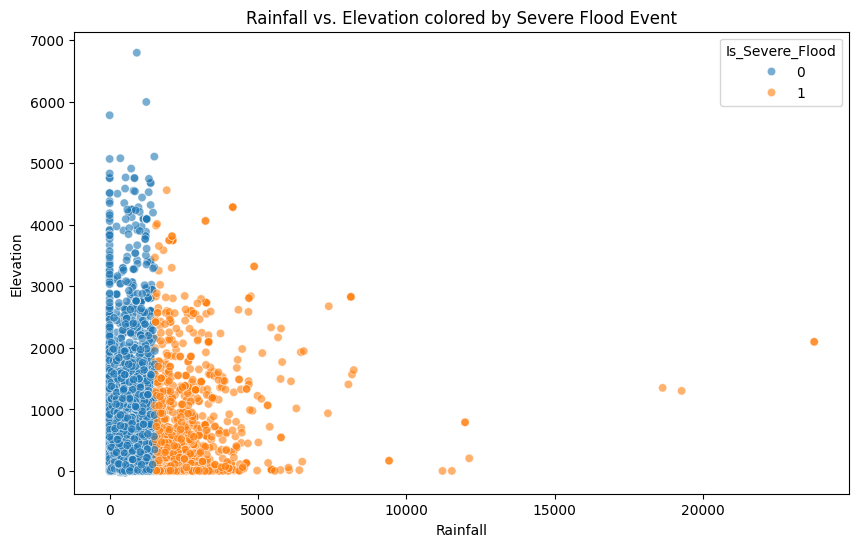

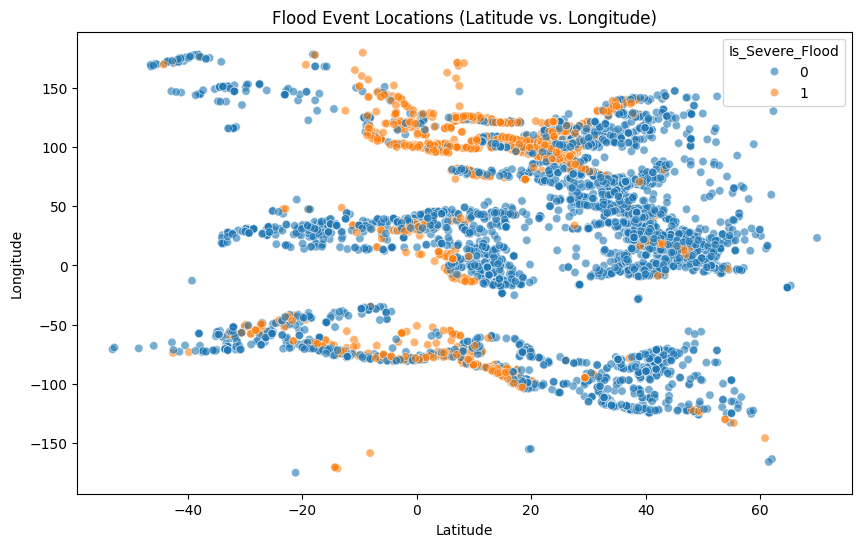

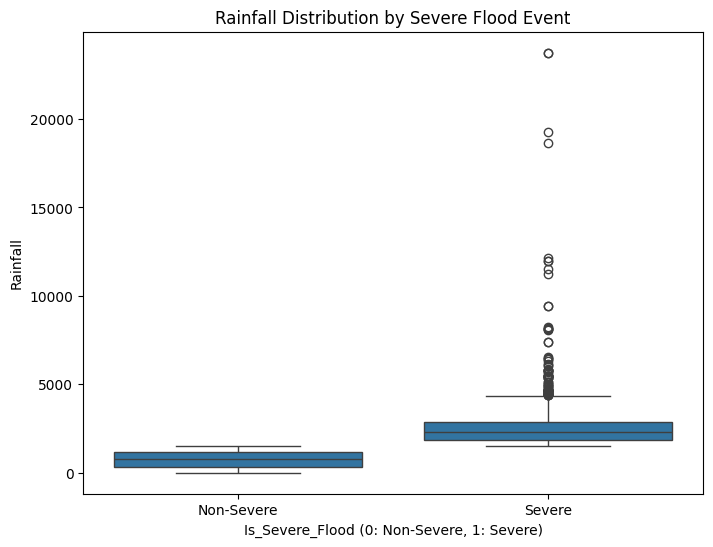

In [19]:
# Let's visualize the relationship between features and the target variable (Is_Severe_Flood)

# Scatter plot of Rainfall vs. Elevation, colored by Is_Severe_Flood
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rainfall', y='Elevation', hue='Is_Severe_Flood', alpha=0.6)
plt.title('Rainfall vs. Elevation colored by Severe Flood Event')
plt.xlabel('Rainfall')
plt.ylabel('Elevation')
plt.show()

# Scatter plot of Latitude vs. Longitude, colored by Is_Severe_Flood
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Is_Severe_Flood', alpha=0.6)
plt.title('Flood Event Locations (Latitude vs. Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Box plot of Rainfall by Is_Severe_Flood
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Is_Severe_Flood', y='Rainfall')
plt.title('Rainfall Distribution by Severe Flood Event')
plt.xlabel('Is_Severe_Flood (0: Non-Severe, 1: Severe)')
plt.ylabel('Rainfall')
plt.xticks([0, 1], ['Non-Severe', 'Severe'])
plt.show()

In [10]:
if 'occured' in df.columns:
    df.rename(columns={'occured': 'Is_Flood_Event'}, inplace=True)
else:
    print("Column 'occured' not found. We will proceed by engineering a new target.")

rainfall_threshold = df['Rainfall'].quantile(0.75)
print(f"The rainfall threshold for a severe flood will be: {rainfall_threshold:.2f} mm")

df['Is_Severe_Flood'] = (df['Rainfall'] > rainfall_threshold).astype(int)

if 'Is_Flood_Event' in df.columns:
    df.drop(columns=['Is_Flood_Event'], inplace=True)

print("\nSuccessfully created the new target variable 'Is_Severe_Flood'.")
print("Here's a look at the DataFrame with the new column:")
print(df.head())

The rainfall threshold for a severe flood will be: 1524.74 mm

Successfully created the new target variable 'Is_Severe_Flood'.
Here's a look at the DataFrame with the new column:
   Latitude  Longitude  time     Rainfall  Elevation      Slope  distance  \
0   52.6717    -0.2995  1900  1383.125626       11.0   1.788207       0.0   
1   35.6897   139.6920  1909  1383.125626       49.0  24.356508       0.0   
2   39.9050   116.3910  1909   580.345856       55.0   8.374380       0.0   
3   23.1288   113.2590  1912  2993.401777        7.0  12.917221       0.0   
4   39.1467   117.2060  1913  1383.125626        3.0   1.513093       0.0   

   Is_Severe_Flood  
0                0  
1                0  
2                0  
3                1  
4                0  


Distribution of Severe vs. Non-Severe Floods:
Is_Severe_Flood
0    4678
1    1559
Name: count, dtype: int64

Plotting distributions for key features...


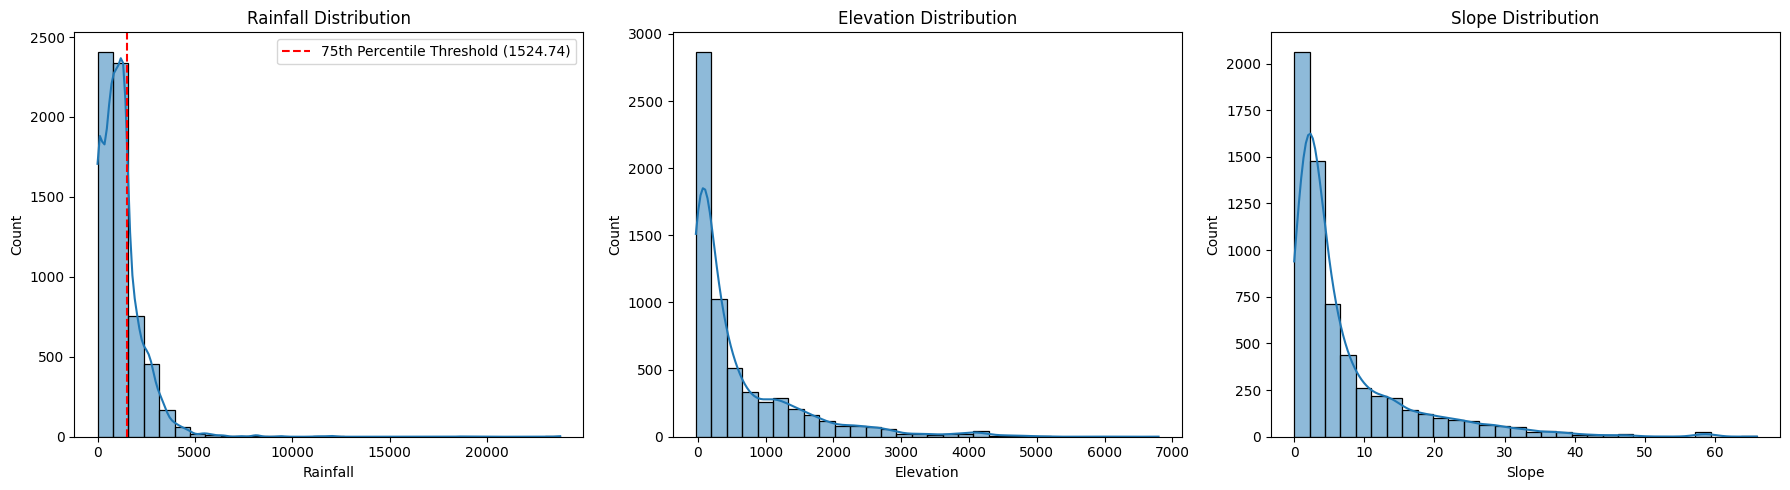

In [11]:
# Check the distribution of our new target variable
print("Distribution of Severe vs. Non-Severe Floods:")
print(df['Is_Severe_Flood'].value_counts())

# Visualize the distribution of the most important numerical features
print("\nPlotting distributions for key features...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Rainfall'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Rainfall Distribution')
axes[0].axvline(rainfall_threshold, color='r', linestyle='--', label=f'75th Percentile Threshold ({rainfall_threshold:.2f})')
axes[0].legend()


sns.histplot(df['Elevation'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Elevation Distribution')

sns.histplot(df['Slope'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Slope Distribution')

plt.tight_layout()
plt.show()

In [12]:
# Calculate the percentage of zero values in the 'distance' column
zero_distance_percentage = (df['distance'] == 0).sum() / len(df) * 100
print(f"Percentage of events with a distance of 0: {zero_distance_percentage:.2f}%")

Percentage of events with a distance of 0: 95.75%


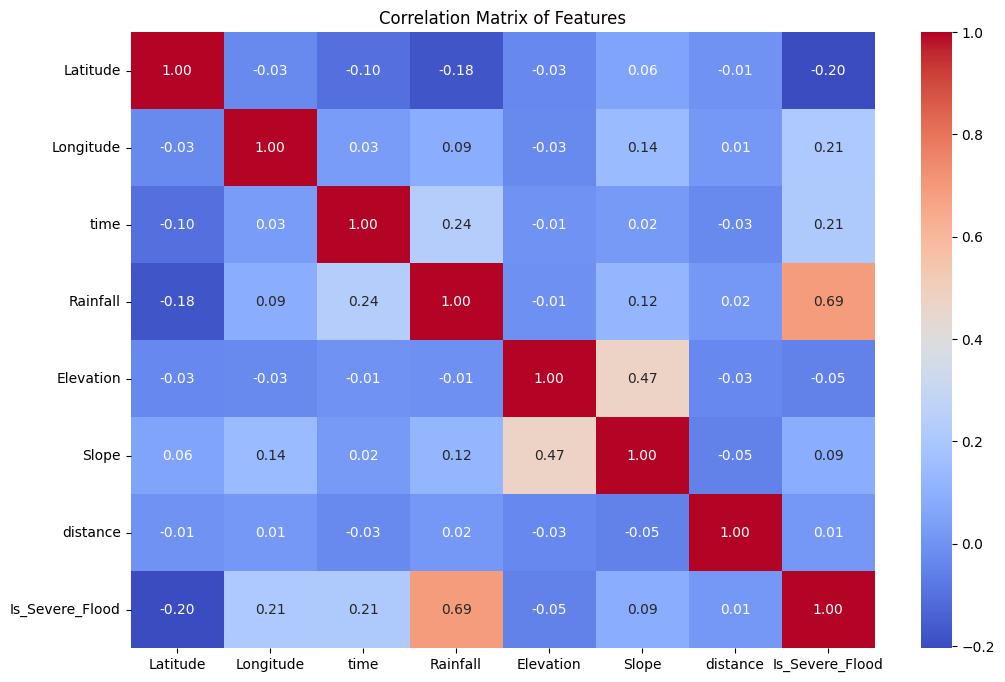

In [13]:
# Create a correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
# Define our features (X) and target (y)
X = df.drop('Is_Severe_Flood', axis=1)
y = df['Is_Severe_Flood']

print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,Latitude,Longitude,time,Rainfall,Elevation,Slope,distance
0,52.6717,-0.2995,1900,1383.125626,11.0,1.788207,0.0
1,35.6897,139.6920,1909,1383.125626,49.0,24.356508,0.0
2,39.9050,116.3910,1909,580.345856,55.0,8.374380,0.0
3,23.1288,113.2590,1912,2993.401777,7.0,12.917221,0.0
4,39.1467,117.2060,1913,1383.125626,3.0,1.513093,0.0



Target (y):


,Is_Severe_Flood
0,0
1,0
2,0
3,1
4,0


from matplotlib import pyplot as plt
_df_0['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['time'].plot(kind='hist', bins=20, title='time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Longitude', y='time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='time', y='Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Rainfall', y='Elevation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Rainfall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Rainfall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['Elevation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('Elevation')

from matplotlib import pyplot as plt
_df_12['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['time'].plot(kind='line', figsize=(8, 4), title='time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

Training set shape: (4989, 7)
Testing set shape: (1248, 7)
Training target distribution:
Is_Severe_Flood
0    0.75005
1    0.24995
Name: proportion, dtype: float64
Testing target distribution:
Is_Severe_Flood
0    0.75
1    0.25
Name: proportion, dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully.")
print("\nShape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled testing data:", X_test_scaled.shape)
print("\nExample of scaled training data (first 5 rows):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


Feature scaling applied successfully.

Shape of scaled training data: (4989, 7)
Shape of scaled testing data: (1248, 7)

Example of scaled training data (first 5 rows):
   Latitude  Longitude      time  Rainfall  Elevation     Slope  distance
0 -1.481347   0.024672  0.635282 -0.188216   0.591494 -0.359501 -0.064466
1 -2.232418   1.660292  0.392452 -0.490651  -0.676950  0.689130 -0.064466
2 -0.503243   0.713691 -0.918832  1.002670  -0.703642 -0.800786 -0.048390
3  1.580616  -1.748190  0.635282 -0.552132  -0.213904 -0.591082 -0.064466
4 -0.264872  -0.390617  0.538150 -0.415908  -0.382179 -0.697471 -0.064466
